In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import matplotlib_inline
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.font_manager as fm
from collections import Counter

In [2]:
df = pd.read_csv('./CrawledData/ㅇㅅㄹ/ㅇㅅㄹ_unsmile.csv',encoding='utf-8')

In [3]:
label = ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']

In [4]:
stats = []
for i in label:
    stats.append(df[i].sum())

In [5]:
plt.rcParams['font.family'] = "NanumGothic"
plt.rcParams['axes.unicode_minus'] = False

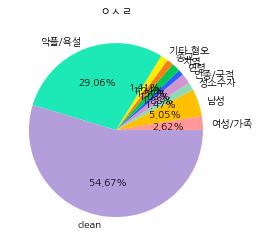

In [6]:
#wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 2}
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#2962FF', '#00c853', '#f57f17', '#ffea00', '#1De9B6', '#b39ddb']
plt.axis=('equal')
plt.title('ㅇㅅㄹ')
plt.pie(stats, labels=label, autopct='%.2f%%', colors=colors)
plt.show()

In [7]:
# 카테고리별로 점수가 높은 순서대로 정렬
df_woman = df.sort_values(by='여성/가족', ascending=False).groupby('text').head(10)
df_man = df.sort_values(by='남성', ascending=False).groupby('text').head(10)
df_region = df.sort_values(by='지역', ascending=False).groupby('text').head(10)
df_queer = df.sort_values(by='성소수자', ascending=False).groupby('text').head(10)
df_religion = df.sort_values(by='종교', ascending=False).groupby('text').head(10)

In [8]:
df_woman.head(20)

,text,label,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
5,그러니까 꼰마 니나 ㅇㅅㄹ같은년은 군화발로 맘껏 짓밟아서 씹창을 내버려야돼 그런 인...,0,0.83,0.05,0.01,0.02,0.02,0.03,0.04,0.05,0.08,0.03
200,야 이만하면 ㅇㅅㄹ 외신기자 둘다 여자들이 폭력성 동급이네 얼마전부터 거기 보호사 ...,0,0.79,0.02,0.01,0.05,0.01,0.01,0.01,0.03,0.10,0.13
360,ㅇㅊㅅ 진짜 막판에 급 악재네 진짜 어떤 심정으로 우리가 ㅇㅈㅁ찍을려는지도 모르고 ...,0,0.66,0.10,0.02,0.01,0.01,0.01,0.01,0.02,0.17,0.10
266,ㅇㅅㄹ영상보고 이민가고 싶다는 분들 ㅋㅋㅋ아직 느그 리ㅈㅁ을 모르는분들 문파들처럼 ...,0,0.36,0.04,0.01,0.02,0.01,0.01,0.01,0.02,0.24,0.35
57,ㅇㅅㄹ은 여자여서 거기서 버르장머리만 고치고나오면 그만인데 솔직히 떨 너는 진짜 맞...,0,0.32,0.04,0.01,0.02,0.01,0.01,0.01,0.03,0.61,0.07
208,우리집 전부 민주당인데 지금 세파로나뉨 똑같이 윤뭐시기가 되면 ㅈ된다는 의견인데 강...,0,0.28,0.03,0.03,0.01,0.00,0.01,0.01,0.01,0.15,0.45
4,꼰마 ㅇㅅㄹ 외신기자 이 새끼들은 절대 봐줄수가 없어 한놈은 자기기만으로 사람을 멍...,0,0.27,0.01,0.01,0.13,0.01,0.01,0.04,0.18,0.45,0.02
137,ㅇㅈㅁ은 펨코에 글썼지만 ㅇㅅㄹ은 신남연이랑 연대하고 사진찍고 신남연으로 댓글 주작...,0,0.20,0.44,0.03,0.02,0.01,0.01,0.01,0.01,0.19,0.17
26,외신기자는 벌써 병원비 1000만원 넘었군 이 년도 꼰마나 ㅇㅅㄹ이랑 똑같지,0,0.15,0.00,0.01,0.15,0.02,0.02,0.02,0.09,0.54,0.05
325,그와는 별개로 이번 선거는 ㅇㅅㄹ이 이길 거라 예측 후보 단일화 효과는 미미할 것 ...,0,0.14,0.03,0.01,0.01,0.01,0.01,0.00,0.01,0.19,0.57


In [9]:
df_man.head(20)

,text,label,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
66,#자캐 이름 최다 득점자 소원 이야 1 3기 자캐들만 모으면 아무도 모를듯 ㅇㄱ ㅁ...,0,0.05,0.91,0.02,0.04,0.02,0.03,0.02,0.02,0.06,0.05
328,유승준은 군대 안갔다고 세상천지 둘도 없는 범죄자 취급하던 그남들은 어디 심지어 유...,0,0.02,0.88,0.05,0.04,0.02,0.02,0.01,0.03,0.09,0.04
82,#자캐이름최다득점자소원 ㄴㅌ ㅅㄹㄴㅌ ㅋㅌㄴㅇ ㅇㅅㄹ ㅇㅂ ㄴㄷㅇ ㅁㅋㅇㄹ ㅂㅅㅇ ...,0,0.04,0.88,0.02,0.03,0.01,0.02,0.02,0.01,0.09,0.05
118,#자캐는 무슨타입 1 날 사랑해줘 2 날 사랑하지 말아줘 3 날 사랑해주지 않아도 ...,1,0.05,0.83,0.03,0.03,0.01,0.02,0.02,0.01,0.10,0.09
80,#자캐 이름 최다 득점자 소원 ㅍㄴㄹㅍ ㅇㅈ ㅂㅂㅊ ㅅ ㅍㄹㅌ ㄷㅈㅇ ㄹㅈ ㅎㅍ ㅇ...,0,0.03,0.83,0.03,0.03,0.01,0.02,0.02,0.01,0.14,0.07
84,#자캐 이름 최다 득점자 소원 커뮤캐들만 ㅋㅁㅇㅇ ㅇㅅㄹ ㅅㄹㅂ ㅂㅇ ㅌㅋㅁ ㅅㅌ ...,0,0.04,0.82,0.03,0.04,0.01,0.02,0.01,0.01,0.11,0.06
73,#자캐 이름 최다 득점자 소원 ㅎㄴㅇ ㄱㅁㅇ ㅊㅎㅈ ㅎㅇㄹ ㅇㅅㄹ ㄱㅅㅎ ㅈㄷㅇ ㅈ...,0,0.03,0.79,0.02,0.03,0.01,0.02,0.01,0.01,0.15,0.07
85,#자캐 이름 최다 득점자 소원 ㅇㅂㅎ ㅅㅇ ㅇㅅㄹ ㄱㅎ ㅂㄹㄴ ㅇㅎ ㅈㅅㅇ ㅎㄹㅇㅅ...,0,0.04,0.78,0.02,0.03,0.01,0.02,0.01,0.01,0.14,0.09
71,#자캐 이름 최다 득점자 소원 이거 다 맞추는 사람이 있을까 트위터에 언급한캐들만 ...,0,0.04,0.77,0.02,0.04,0.01,0.02,0.01,0.01,0.14,0.09
76,#자캐 이름 최다 득점자 소원 ㄹㅅㄴ ㅇㅅㄹ ㅎㅈㅎ ㅇㅅㅎ ㅅㅅㅎ ㅍㄹㄹㅌ ㅇㄷㄹㅇ...,0,0.03,0.77,0.02,0.03,0.01,0.02,0.01,0.01,0.14,0.10


In [10]:
df_man.head(20)

,text,label,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
66,#자캐 이름 최다 득점자 소원 이야 1 3기 자캐들만 모으면 아무도 모를듯 ㅇㄱ ㅁ...,0,0.05,0.91,0.02,0.04,0.02,0.03,0.02,0.02,0.06,0.05
328,유승준은 군대 안갔다고 세상천지 둘도 없는 범죄자 취급하던 그남들은 어디 심지어 유...,0,0.02,0.88,0.05,0.04,0.02,0.02,0.01,0.03,0.09,0.04
82,#자캐이름최다득점자소원 ㄴㅌ ㅅㄹㄴㅌ ㅋㅌㄴㅇ ㅇㅅㄹ ㅇㅂ ㄴㄷㅇ ㅁㅋㅇㄹ ㅂㅅㅇ ...,0,0.04,0.88,0.02,0.03,0.01,0.02,0.02,0.01,0.09,0.05
118,#자캐는 무슨타입 1 날 사랑해줘 2 날 사랑하지 말아줘 3 날 사랑해주지 않아도 ...,1,0.05,0.83,0.03,0.03,0.01,0.02,0.02,0.01,0.10,0.09
80,#자캐 이름 최다 득점자 소원 ㅍㄴㄹㅍ ㅇㅈ ㅂㅂㅊ ㅅ ㅍㄹㅌ ㄷㅈㅇ ㄹㅈ ㅎㅍ ㅇ...,0,0.03,0.83,0.03,0.03,0.01,0.02,0.02,0.01,0.14,0.07
84,#자캐 이름 최다 득점자 소원 커뮤캐들만 ㅋㅁㅇㅇ ㅇㅅㄹ ㅅㄹㅂ ㅂㅇ ㅌㅋㅁ ㅅㅌ ...,0,0.04,0.82,0.03,0.04,0.01,0.02,0.01,0.01,0.11,0.06
73,#자캐 이름 최다 득점자 소원 ㅎㄴㅇ ㄱㅁㅇ ㅊㅎㅈ ㅎㅇㄹ ㅇㅅㄹ ㄱㅅㅎ ㅈㄷㅇ ㅈ...,0,0.03,0.79,0.02,0.03,0.01,0.02,0.01,0.01,0.15,0.07
85,#자캐 이름 최다 득점자 소원 ㅇㅂㅎ ㅅㅇ ㅇㅅㄹ ㄱㅎ ㅂㄹㄴ ㅇㅎ ㅈㅅㅇ ㅎㄹㅇㅅ...,0,0.04,0.78,0.02,0.03,0.01,0.02,0.01,0.01,0.14,0.09
71,#자캐 이름 최다 득점자 소원 이거 다 맞추는 사람이 있을까 트위터에 언급한캐들만 ...,0,0.04,0.77,0.02,0.04,0.01,0.02,0.01,0.01,0.14,0.09
76,#자캐 이름 최다 득점자 소원 ㄹㅅㄴ ㅇㅅㄹ ㅎㅈㅎ ㅇㅅㅎ ㅅㅅㅎ ㅍㄹㄹㅌ ㅇㄷㄹㅇ...,0,0.03,0.77,0.02,0.03,0.01,0.02,0.01,0.01,0.14,0.10


In [11]:
df_region.head(20)

,text,label,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
362,엄마아빠 왜 ㅇㅅㄹ뽑으려고 하냔말이야 나같은 사람들 걔가 뽑히면 정말 먹고살기 힘들...,0,0.02,0.02,0.01,0.08,0.02,0.88,0.02,0.02,0.04,0.05
346,칭구들아 뱀동님이랑 덕질 같이 해줘 ㅇㅅㄹ 괜찮단다 학창시절에 같이 덕질할 친구가 ...,1,0.01,0.03,0.03,0.39,0.01,0.41,0.02,0.01,0.02,0.33
152,올림픽 마치면 한동안 트위터 어플을 지울까 예전부터 ㅇㅈㅁ 정말 싫었고 시장으로 뽑...,0,0.01,0.01,0.01,0.05,0.01,0.05,0.01,0.03,0.61,0.08
329,전 중도입니다 현 정권과 민주당은 내로남불 대마왕 문통은 어벙벙 ㅇㅈㅁ 은 온갖비리...,0,0.02,0.00,0.01,0.03,0.00,0.04,0.01,0.05,0.50,0.19
368,내 친구의 친구 글로 뜨는건가봐 한정애 최재천 같은 국회의원이 팔로잉한 문파들 같은...,1,0.01,0.01,0.01,0.03,0.01,0.04,0.01,0.01,0.10,0.79
330,어제오늘 앓다가 단일화 이제 알았어 이미 선거 끝난 사람들이 수두룩왕창인데 지금와서...,0,0.01,0.01,0.01,0.01,0.01,0.04,0.01,0.03,0.80,0.11
259,털칭구들 사진에 힐링되다가 ㅇㅅㄹ기사에 개빡침이 반복되고 있네요 하효,0,0.01,0.01,0.01,0.02,0.01,0.04,0.01,0.01,0.09,0.83
258,ㅇㅅㄹ 우리 동내쪽 왔었다네 첨앎,0,0.01,0.01,0.01,0.02,0.01,0.03,0.01,0.01,0.06,0.91
153,경기도지사 투표 때 이ㅈㅁ이 민주당 후보로 당선되는 게 싫어서 울면서 반대 투표 했...,0,0.02,0.01,0.01,0.02,0.01,0.03,0.01,0.03,0.88,0.07
148,ㅇㅈㅁ 도 ㅇㅅㄹ 도 둘다 대통령이 되서는 안된다고 생각하는데 그렇다고 ㅇㅊㅅ 를 ...,0,0.01,0.01,0.01,0.01,0.01,0.03,0.01,0.01,0.16,0.79


In [12]:
df_queer.head(20)

,text,label,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
290,3 등급 유감 퀴즈도 풀고 만들기까지 #내가만드는퀴즈 #퀴즈바이미 3등급 만족해여 ㅇㅅㄹ,0,0.02,0.02,0.56,0.03,0.01,0.01,0.01,0.02,0.09,0.30
364,ㅇㅅㄹ은 공포스럽고 민주당의 가해자와 그걸 옹호하던 이차가해자들이 너무 생생해서 고...,0,0.02,0.01,0.29,0.01,0.01,0.02,0.01,0.09,0.28,0.18
9,ㄸㅂㄹ ㅅㅊㅈ ㅇㅅㄹ 트윗터를 점령했구나 지능이 모지난 것도 질병일 줄이야ㅋㅋ,0,0.02,0.02,0.12,0.01,0.01,0.00,0.01,0.06,0.72,0.13
317,신랑 손가락 모양에 자들거리는뎈ㅋㅋㅋㅋㅋ정치색 너무 뚜렷한 1번남이라 ㅇㅅㄹ은 미친...,0,0.02,0.25,0.11,0.01,0.01,0.01,0.03,0.02,0.27,0.12
154,교류 해시 추천해드려욧 님은 유즈#마음함 트친 이름 이쁘게 써주기 ㅇㅅㄹ,1,0.06,0.03,0.10,0.02,0.01,0.00,0.01,0.01,0.11,0.68
91,#자신의 본명 초성을 보고 트친이 상상한 이름 ㅇㅅㄹ 특이하죠,0,0.05,0.03,0.08,0.02,0.00,0.00,0.01,0.01,0.23,0.50
222,ㅇㅅㄹ은 왜 ㅅㅅㅈ 앞에서 작아질까 라는 나의 물음에 로맨티스트 아닐까요 ㅅㅅㅈ을 ...,1,0.07,0.06,0.07,0.01,0.01,0.01,0.01,0.01,0.15,0.62
179,자몽이 오랜만 다음은 나의사랑 너의사랑 ㅇㅅㄹ,1,0.03,0.11,0.06,0.03,0.00,0.01,0.01,0.01,0.18,0.41
374,ㅇㅈㅁ 열받아서 욕나오는거 꾹참느라 힘들어보임ㅇㅅㄹ은 찰스씨 퀴즈타임과 ㅅㅅㅈ한테 ...,0,0.06,0.03,0.05,0.01,0.01,0.00,0.01,0.01,0.31,0.45
239,ㅇㅅㄹ 어으 ㅇ악 싫어 아 순애 순애는 이상성욕이라 생각해 그치만 남의 순애는 좋더라,0,0.01,0.01,0.05,0.02,0.00,0.01,0.01,0.01,0.18,0.69


In [13]:
# 0.6이상인 텍스트들만 추출
df_woman = df_woman[df_woman['여성/가족'] >= 0.6]
df_man = df_man[df_man['남성'] >= 0.6]
df_region = df_region[df_region['지역'] >= 0.6]
df_queer = df_queer[df_queer['성소수자'] >= 0.6]
df_religion = df_religion[df_religion['종교'] >= 0.6]

In [14]:
# 전체 갯수 확인
print(len(df_woman))
print(len(df_man))
print(len(df_region))
print(len(df_queer))
print(len(df_religion))

3
20
1
0
1


### 데이터 개수가 적어 생략

In [15]:
#print('여성/가족 긍정 리뷰 갯수: {}'.format(df_woman['label'].value_counts()[1]))
#print('여성/가족 부정 리뷰 갯수: {}'.format(df_woman['label'].value_counts()[0]))
#print('남성 긍정 리뷰 갯수: {}'.format(df_man['label'].value_counts()[1]))
#print('남성 부정 리뷰 갯수: {}'.format(df_man['label'].value_counts()[0]))
#print('지역 긍정 리뷰 갯수: {}'.format(df_region['label'].value_counts()[1]))
#print('지역 부정 리뷰 갯수: {}'.format(df_region['label'].value_counts()[0]))
#print('성소수자 긍정 리뷰 갯수: {}'.format(df_queer['label'].value_counts()[1]))
#print('성소수자 부정 리뷰 갯수: {}'.format(df_queer['label'].value_counts()[0]))
#print('성소수자 긍정 리뷰 갯수: {}'.format(df_religion['label'].value_counts()[1]))
#print('성소수자 부정 리뷰 갯수: {}'.format(df_religion['label'].value_counts()[0]))

In [16]:
# 긍정, 부정 분포도
def posNneg(df):
    label = ['positive', 'negative']
    index =  np.arange(len(df['label']))
    value = [df['label'].value_counts()[1], df['label'].value_counts()[0]]
    value = [0, df['label'].value_counts()[0]]
    plt.bar(label, value, color=['r', 'b'], alpha=0.5)
    plt.title('Distribution of Pos and Neg', fontsize=15)
    plt.xlabel('label')
    plt.ylabel('count')
    plt.show()

In [17]:
# 백업용 저장
df_woman.to_csv('./CrawledData/ㅇㅅㄹ/ㅇㅅㄹ_여성.csv', encoding='utf-8-sig',sep=',', index=False)
df_man.to_csv('./CrawledData/ㅇㅅㄹ/ㅇㅅㄹ_남성.csv', encoding='utf-8-sig',sep=',', index=False)
df_region.to_csv('./CrawledData/ㅇㅅㄹ/ㅇㅅㄹ_지역.csv', encoding='utf-8-sig',sep=',', index=False)
#df_queer.to_csv('./CrawledData/ㅇㅅㄹ/ㅇㅅㄹ_성소수자.csv', encoding='utf-8-sig',sep=',', index=False)
df_religion.to_csv('./CrawledData/ㅇㅅㄹ/ㅇㅅㄹ_종교.csv', encoding='utf-8-sig',sep=',', index=False)

In [18]:
df_woman = pd.read_csv('./CrawledData/ㅇㅅㄹ/ㅇㅅㄹ_여성.csv', encoding='utf-8')
df_man = pd.read_csv('./CrawledData/ㅇㅅㄹ/ㅇㅅㄹ_남성.csv', encoding='utf-8')
df_region = pd.read_csv('./CrawledData/ㅇㅅㄹ/ㅇㅅㄹ_지역.csv', encoding='utf-8')
#df_queer = pd.read_csv('./CrawledData/ㅇㅅㄹ/ㅇㅅㄹ_성소수자.csv', encoding='utf-8')
df_religion=pd.read_csv('./CrawledData/ㅇㅅㄹ/ㅇㅅㄹ_종교.csv', encoding='utf-8')

In [19]:
from konlpy.tag import Mecab

In [20]:
# Preprocessing code with Mecab
#dicpath="/usr/local/lib/mecab/dic/mecab-ko-dic"
mecab = Mecab(r"C:/mecab/mecab-ko-dic") # Mecab User Dic Path

def preprocessing_mecab(readData):
    
    #### Tokenize
    morphs = mecab.pos(readData)
    
    JOSA = ["JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC"] # 조사
    SIGN = ["SF", "SE", "SSO", "SSC", "SC", "SY"] # 문장 부호
    TERMINATION = ["EP", "EF", "EC", "ETN", "ETM"] # 어미
    SUPPORT_VERB = ["VX"] # 보조 용언
    NUMBER = ["SN"]
    
    # Remove JOSA, EOMI, etc
    morphs[:] = (morph for morph in morphs if morph[1] not in JOSA+SIGN+TERMINATION+SUPPORT_VERB)
        
    # Remove length-1 words  
    morphs[:] = (morph for morph in morphs if not (len(morph[0]) == 1))
    
    # Remove Numbers
    morphs[:] = (morph for morph in morphs if morph[1] not in NUMBER)
   
    # Result pop-up
    result = []
    for morph in morphs:
        result.append(morph[0])
        
    return result

In [21]:
df_woman['tokenized'] = df_woman['text'].apply(lambda x: preprocessing_mecab(x))
df_man['tokenized'] = df_man['text'].apply(lambda x: preprocessing_mecab(x))
df_region['tokenized'] = df_region['text'].apply(lambda x: preprocessing_mecab(x))
#df_queer['tokenized'] = df_queer['text'].apply(lambda x: preprocessing_mecab(x))
df_religion['tokenized'] = df_religion['text'].apply(lambda x: preprocessing_mecab(x))

In [22]:
token_woman = df_woman['tokenized']
token_man = df_man['tokenized']
token_region = df_region['tokenized']
#token_queer = df_queer['tokenized']
token_religion = df_religion['tokenized']

In [23]:
# tokenizing
# stopwords list
stop_words = pd.read_csv('./한국어불용어100.txt', sep = "\t", engine='python')
stop_words = list(stop_words["word"])
# 동일 초성 및 의미없는 단어 리스트 생성, ㅇㅅㄹ는 키워드이기 때문에 제외
same = ['ㅇㅈㅁ이', 'ㅇㅈㅁ을', 'ㅇㅈㅁ도', 'ㅇㅈㅁ은', 'ㅇㅈㅁ의']
same2 = ['ㅇㅅㅇ이', 'ㅇㅅㅇ은']
same3 = ['ㅇㅅㄹ은', 'ㅇㅅㄹ이', 'ㅇㅅㄹ커', 'ㅇㅅㄹ이는', 'ㅇㅅㄹ의', 'ㅇㅅㄹ이랑', 'ㅇㅅㄹ도']
stopwords = ['ㅇㄴ', 'ㅇㄹ', 'ㅇㄷ', 'ㅇㅅㅇ', 'ㅇㅇㅇ', 'ㅍㅅ', 'ㅎㅎ', 'ㅊㅎㅈㄱ', 'ㅇㅇ', 'ㅇㅅ', 'ㅇㅌ', '그렇', '그리고','ㅇㅅㄹ', '나오','이번', '때문', '그러', '그런', '진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는','생겼', '인데', '해도', '된다', '이거','한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ','그냥', '한다는', '해서', '인데', '라면', '만들', '라니']
stopwords = stopwords+stop_words
stopwords.remove('여자')

In [24]:
print(stopwords)

['ㅇㄴ', 'ㅇㄹ', 'ㅇㄷ', 'ㅇㅅㅇ', 'ㅇㅇㅇ', 'ㅍㅅ', 'ㅎㅎ', 'ㅊㅎㅈㄱ', 'ㅇㅇ', 'ㅇㅅ', 'ㅇㅌ', '그렇', '그리고', 'ㅇㅅㄹ', '나오', '이번', '때문', '그러', '그런', '진짜', '아니', '근데', '그냥', '라고', '한다고', '해서', '이런', '어차피', '버리', '된다는', '생겼', '인데', '해도', '된다', '이거', '한다', '세요', '합니다', '입니다', 'ㅋㅋㅋ', 'ㅋㅋ', '그냥', '한다는', '해서', '인데', '라면', '만들', '라니', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내', '내', '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '개', '전', '들', '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓']


In [25]:
category = [token_woman, token_man, token_region, token_religion]
title = ['여성/가족', '남성', '지역', '종교']

In [26]:
# 단어 빈도수 생성
# 단어 빈도수 그래프 만들기
def word_frequency(token, title):  
    n_corpus = [] 
    for t in token:
        for j in t:
            if j in same:
                j = 'ㅇㅈㅁ'
            elif j in same2:
                j = 'ㅇㅅㅇ'
            elif j in same3:
                j = 'ㅇㅅㄹ'
            if j not in stopwords:
                n_corpus.append(j)

    count = Counter(n_corpus) 
    most = count.most_common() #빈도 수 순으로 추출 
    x, y= [], [] 
    for word,count in most[:40]: 
        x.append(word) 
        y.append(count)
    #plt.rc('font',family='NanumGothic.ttf')
    plt.rcParams['font.family'] = "NanumGothic"
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(10,10)) 
    sns.barplot(x=y,y=x)
    plt.title(title)

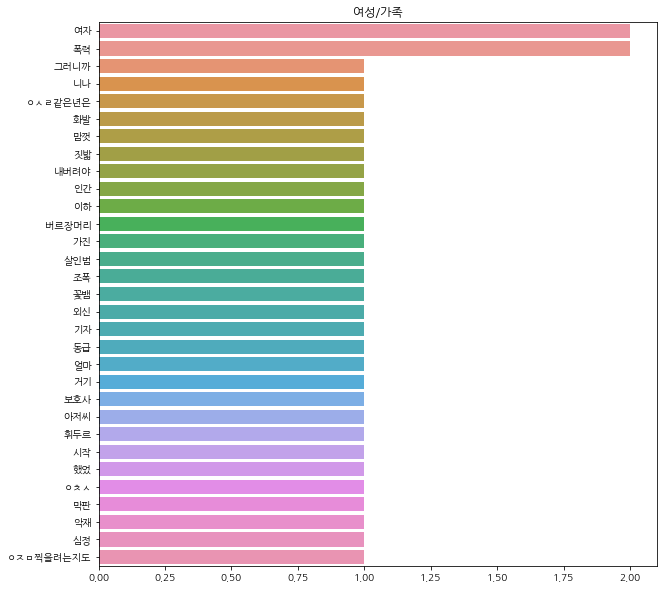

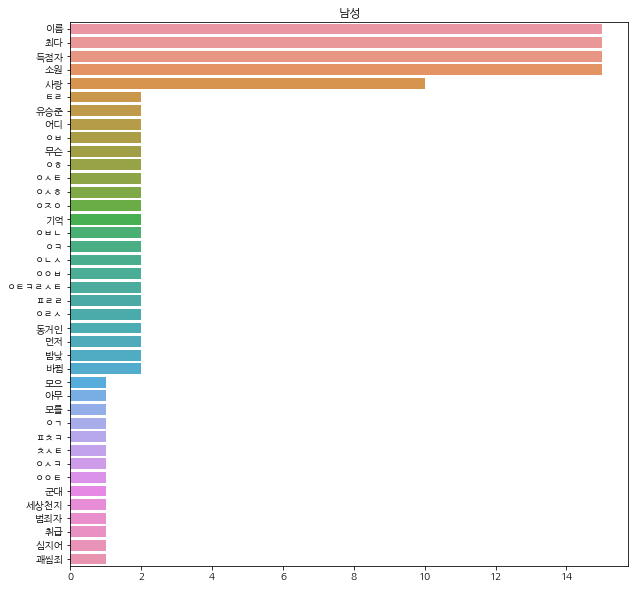

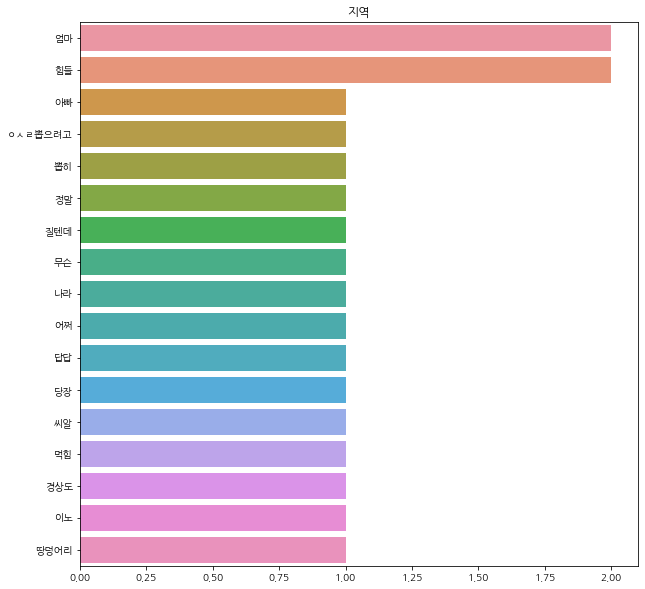

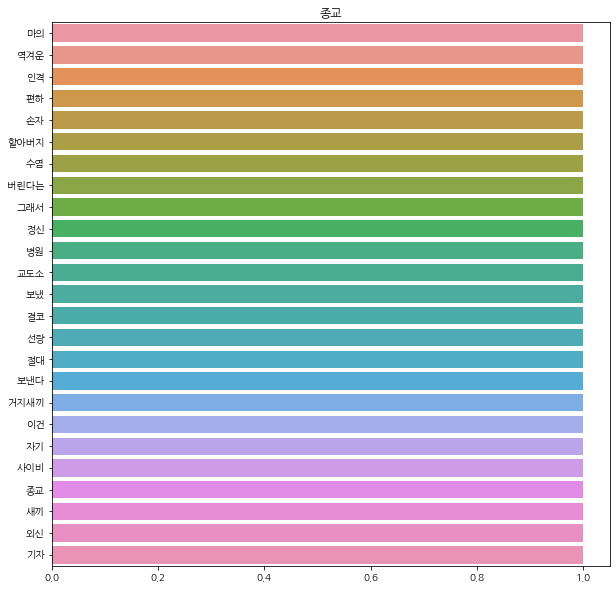

In [27]:
# 여성/가족, 남성, 지역, 종교
for c, t in zip(category, title):
    word_frequency(c, t)

In [28]:
def make_wordcloud(token, title): 
    n_corpus = []
    for t in token:
        for j in t:
            if j in same:
                j = 'ㅇㅈㅁ'
            elif j in same2:
                j = 'ㅇㅅㅇ'
            elif j in same3:
                j = 'ㅇㅅㄹ'
            if j not in stopwords:
                n_corpus.append(j)
                    
    font_path = 'C:/Users/Erin/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.ttf'
    wordcloud = WordCloud(font_path=font_path,
                background_color="black",
                stopwords=stopwords, 
                max_words=100, 
                #max_font_size=50, 
                width=500,
                height=500,
                random_state=1,
                scale=2).generate(' '.join(n_corpus))
    fig = plt.figure(1, figsize=(8,8)) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    #plt.axis('on')
    plt.show()   

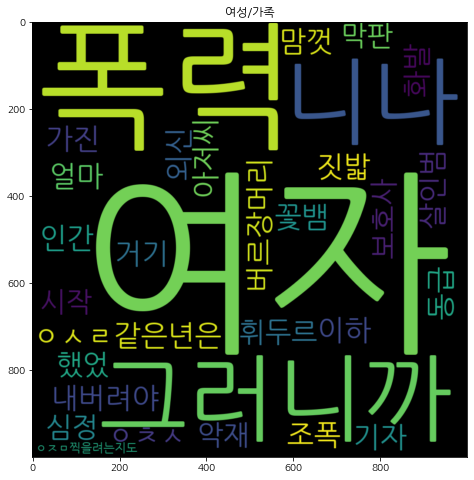

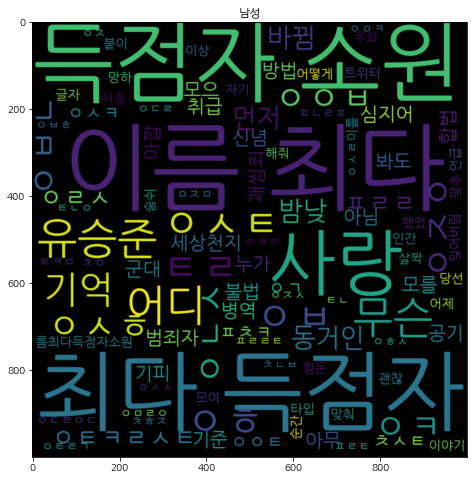

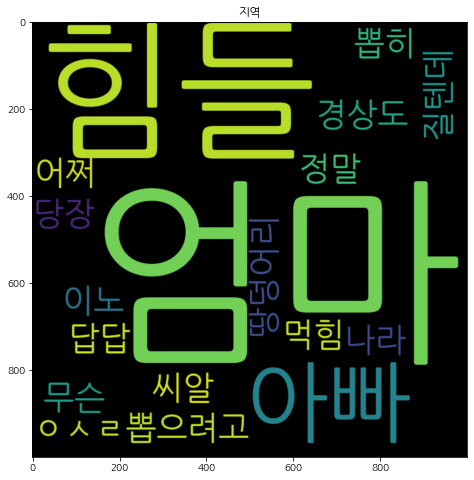

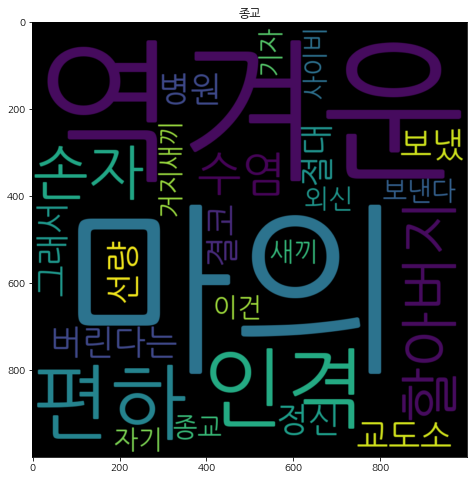

In [29]:
for c, t in zip(category, title):
    make_wordcloud(c, t)